In [2]:
X_train = pd.read_csv('Data/Final/X_train_sc.csv')
X_test = pd.read_csv('Data/Final/X_test_sc.csv')
y_train = pd.read_csv('Data/Final/y_train_sc.csv')
y_test = pd.read_csv('Data/Final/y_test_sc.csv')

In [3]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31324, 12), (16868, 12), (31324, 1), (16868, 1))

In [4]:
## Loading scaler

sc_X = pickle.load(open('Data/X_scaler.pkl', 'rb'))
sc_y= pickle.load(open('Data/y_scaler.pkl', 'rb'))

In [5]:
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)

In [6]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [7]:
n_steps = 40

In [8]:
X_train,y_train = split_sequences(train.to_numpy(),n_steps=n_steps)
X_test,y_test = split_sequences(test.to_numpy(),n_steps=n_steps)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31284, 40, 13), (16828, 40, 13), (31284, 13), (16828, 13))

In [10]:
n_features = X_train.shape[2]
n_features

13

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [14]:
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(n_steps, n_features)))
model.add(LSTM(100))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 100)           45600     
_________________________________________________________________
lstm_4 (LSTM)                (None, 40, 30)            15720     
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                403       
Total params: 69,043
Trainable params: 69,043
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=70,batch_size=64,verbose=1)

Epoch 1/70
489/489 [==============================] - 32s 66ms/step - loss: 0.0017 - val_loss: 4.9436e-04
Epoch 2/70
489/489 [==============================] - 34s 69ms/step - loss: 0.0015 - val_loss: 4.2968e-04
Epoch 3/70
489/489 [==============================] - 33s 68ms/step - loss: 0.0015 - val_loss: 3.5157e-04
Epoch 4/70
489/489 [==============================] - 33s 68ms/step - loss: 0.0014 - val_loss: 3.5596e-04
Epoch 5/70
489/489 [==============================] - 32s 66ms/step - loss: 0.0014 - val_loss: 3.3437e-04
Epoch 6/70
489/489 [==============================] - 32s 66ms/step - loss: 0.0013 - val_loss: 3.3051e-04
Epoch 7/70
489/489 [==============================] - 33s 67ms/step - loss: 0.0013 - val_loss: 2.9384e-04
Epoch 8/70
489/489 [==============================] - 33s 67ms/step - loss: 0.0013 - val_loss: 2.8280e-04
Epoch 9/70
489/489 [==============================] - 33s 67ms/step - loss: 0.0013 - val_loss: 2.6997e-04
Epoch 10/70
489/489 [=========================

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = train_predict[:,-1].reshape(-1, 1)
test_predict = test_predict[:,-1].reshape(-1, 1)

In [ ]:
t_y_train = y_train[:,-1].reshape(-1, 1)
t_y_test = y_test[:,-1].reshape(-1, 1)
print(t_y_train.shape,train_predict.shape)

In [ ]:
train_predict = sc_y.inverse_transform(train_predict)
test_predict = sc_y.inverse_transform(test_predict)

In [ ]:
t_y_train = sc_y.inverse_transform(t_y_train)
t_y_test = sc_y.inverse_transform(t_y_test)

In [20]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
print('RMSE (train):',math.sqrt(mean_squared_error(t_y_train,train_predict)))
print('MAE (train):',mean_absolute_error(t_y_train,train_predict))

print('\nRMSE (test):',math.sqrt(mean_squared_error(t_y_test,test_predict)))
print('MAE (test):',mean_absolute_error(t_y_test,test_predict))

In [ ]:
print('R2 Score (train):',r2_score(t_y_train,train_predict))
print('R2 Score (test):',r2_score(t_y_test,test_predict))

In [ ]:
## Plotting the preds with true results

plt.scatter(t_y_train,train_predict)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(t_y_test,test_predict)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(range(200),t_y_test[0:200])
plt.plot(range(200),test_predict[0:200])
plt.show()

## Forcasting All the features

In [26]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [27]:
train_predict.shape,test_predict.shape

((31284, 13), (16828, 13))

In [28]:
tr_pred_X = sc_X.inverse_transform(train_predict[:,:-1])
te_pred_X = sc_X.inverse_transform(test_predict[:,:-1])

tr_pred_y = sc_y.inverse_transform(train_predict[:,-1].reshape(-1, 1))
te_pred_y = sc_y.inverse_transform(test_predict[:,-1].reshape(-1, 1))

train_predict = np.concatenate((tr_pred_X,tr_pred_y),axis=1)
test_predict = np.concatenate((te_pred_X,te_pred_y),axis=1)

In [29]:
train_predict.shape,test_predict.shape

((31284, 13), (16828, 13))

In [31]:
y_train.shape,y_test.shape

((31284, 13), (16828, 13))

In [32]:
tr_true_X = sc_X.inverse_transform(y_train[:,:-1])
te_true_X = sc_X.inverse_transform(y_test[:,:-1])

tr_true_y = sc_y.inverse_transform(y_train[:,-1].reshape(-1, 1))
te_true_y = sc_y.inverse_transform(y_test[:,-1].reshape(-1, 1))

t_y_train = np.concatenate((tr_true_X,tr_true_y),axis=1)
t_y_test = np.concatenate((te_true_X,te_true_y),axis=1)

In [33]:
for i in range(0,13):
    i_train_predict = train_predict[:,i].reshape(-1, 1)
    i_test_predict = test_predict[:,i].reshape(-1, 1)
    
    i_y_train = t_y_train[:,i].reshape(-1, 1)
    i_y_test = t_y_test[:,i].reshape(-1, 1)
    
    print('----------------',train.columns[i],'----------------')
    print('RMSE (train):',math.sqrt(mean_squared_error(i_y_train,i_train_predict)))
    print('MAE (train):',mean_absolute_error(i_y_train,i_train_predict))
    print('R2 Score (train):',r2_score(i_y_train,i_train_predict))
    
    print('\nRMSE (test):',math.sqrt(mean_squared_error(i_y_test,i_test_predict)))
    print('MAE (test):',mean_absolute_error(i_y_test,i_test_predict))
    print('R2 Score (test):',r2_score(i_y_test,i_test_predict))
    print('-----------------------------------------------------')

---------------- PM2.5 ----------------
RMSE (train): 22.325729253369218
MAE (train): 9.398307999580393
R2 Score (train): 0.6474359590841665

RMSE (test): 10.860167884974645
MAE (test): 6.9965594940074345
R2 Score (test): 0.7370091192230297
-----------------------------------------------------
---------------- PM10 ----------------
RMSE (train): 22.123348841875476
MAE (train): 12.72676567577612
R2 Score (train): 0.7757082203967135

RMSE (test): 12.565154210678735
MAE (test): 8.05462800190742
R2 Score (test): 0.8783203189542017
-----------------------------------------------------
---------------- NO ----------------
RMSE (train): 7.114326183243252
MAE (train): 3.4036205133763344
R2 Score (train): 0.7129357882432608

RMSE (test): 5.629455275471175
MAE (test): 2.7683713509892556
R2 Score (test): 0.720332667934859
-----------------------------------------------------
---------------- NO2 ----------------
RMSE (train): 9.071031975530728
MAE (train): 5.182839738187431
R2 Score (train): 0.82

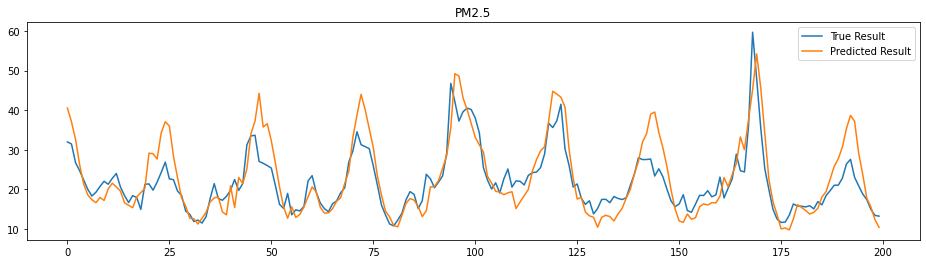

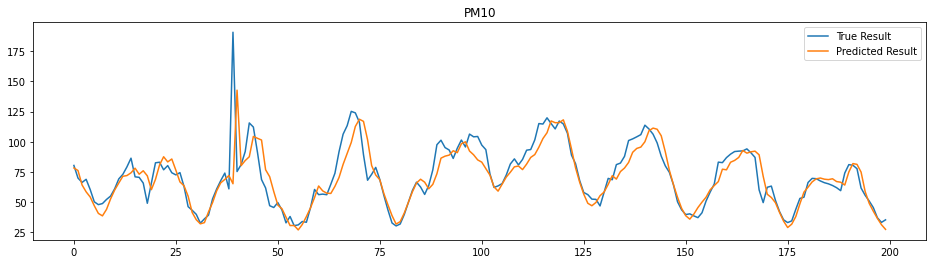

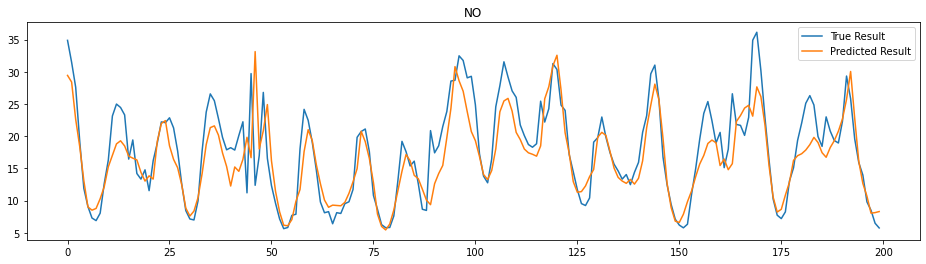

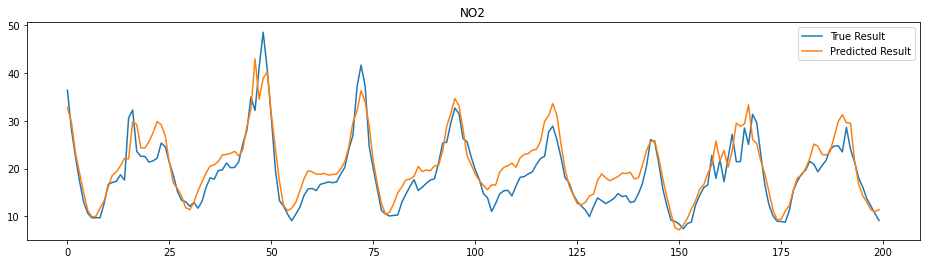

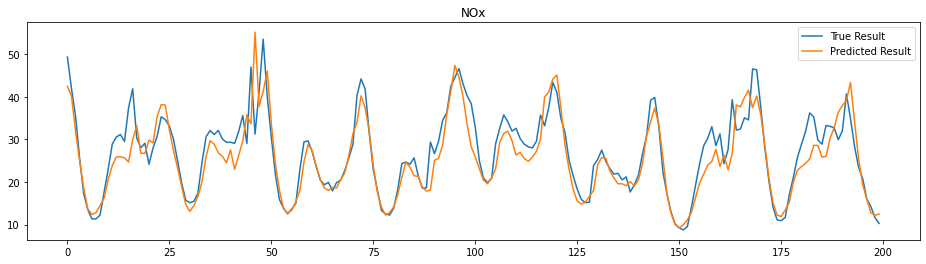

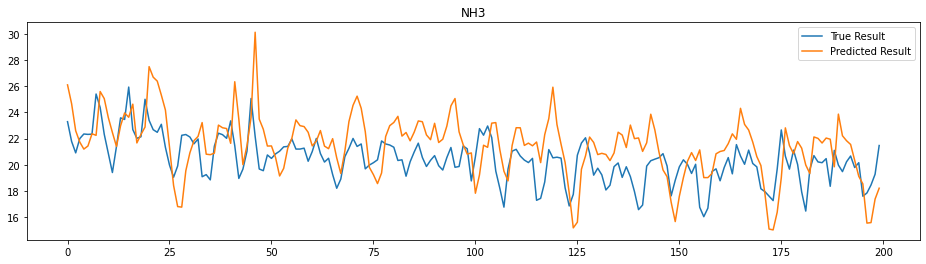

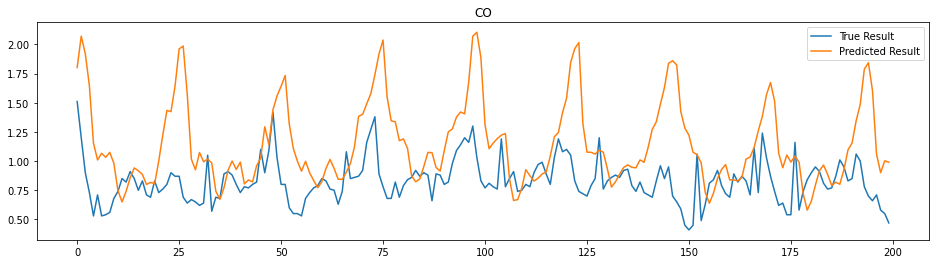

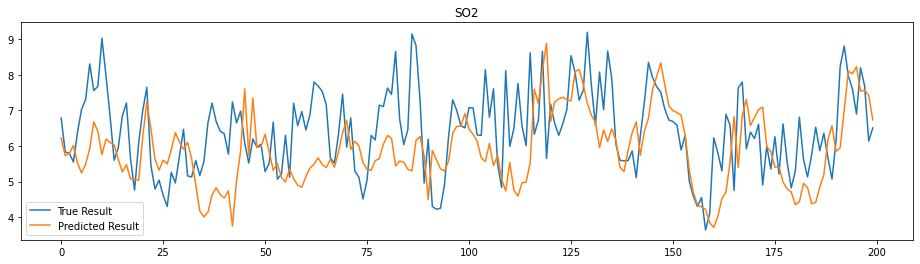

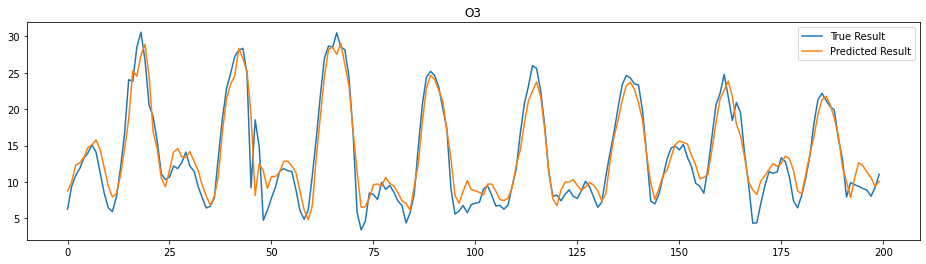

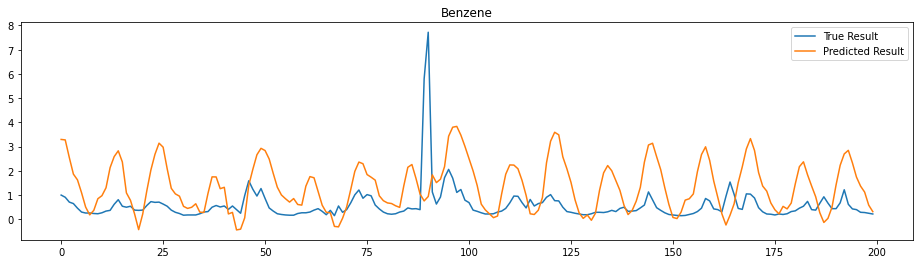

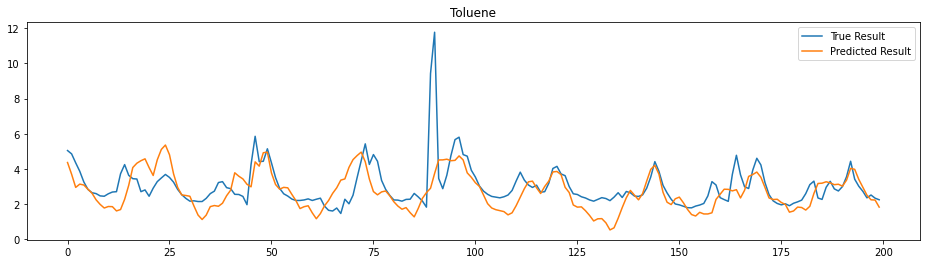

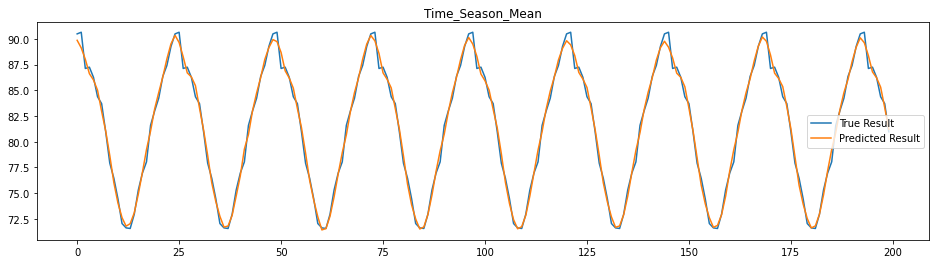

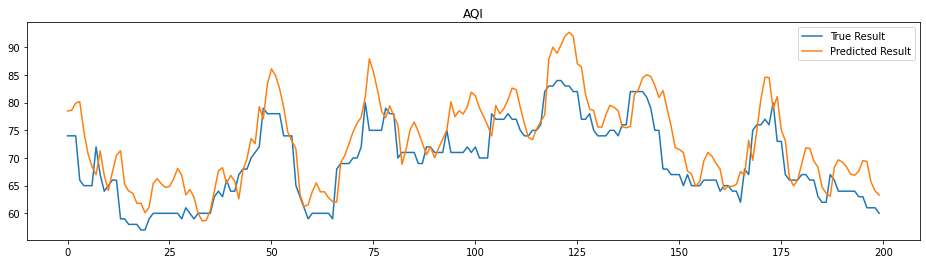

In [34]:
for i in range(0,13):
    i_train_predict = train_predict[:,i].reshape(-1, 1)
    i_test_predict = test_predict[:,i].reshape(-1, 1)
    
    i_y_train = t_y_train[:,i].reshape(-1, 1)
    i_y_test = t_y_test[:,i].reshape(-1, 1)
    
    #print('----------------',train.columns[i],'----------------')
    plt.figure(figsize=(16,4))
    plt.title(train.columns[i])
    plt.plot(range(200),i_y_test[0:200],label='True Result')
    plt.plot(range(200),i_test_predict[0:200],label='Predicted Result')
    plt.legend()
    plt.show()
    #print('-----------------------------------------------------')

## Predicting for the next 30 days

In [109]:
X_input = X_test[-1]
X_input.shape

(40, 13)

In [42]:
from numpy import array

In [110]:
output = []
i=0

while i<30:
    pred = model.predict(X_input.reshape(1,X_input.shape[0],X_input.shape[1]))
    output.append(np.array(pred[0]))
    
    X_input = np.concatenate((X_input, pred),axis=0)
    X_input = X_input[1:]
    i = i+1

In [111]:
len(output)

30

In [112]:
output = np.array(output)

In [113]:
output[:,-1].shape

(30,)

In [114]:
y_test[-30:,-1].shape

(30,)

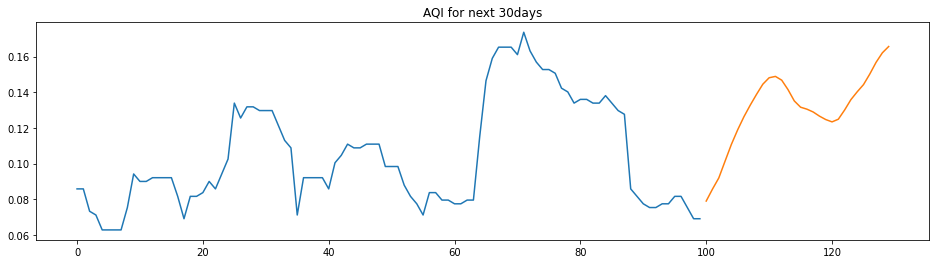

In [119]:
plt.figure(figsize=(16,4))
plt.title('AQI for next 30days')    
plt.plot(range(0,100), y_test[-100:,-1])
plt.plot(range(100,130), output[:,-1])
plt.show()

In [122]:
model.save(filepath='Data/Models/lstm2_regression.h5')